In [1]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
from mpl_toolkits.mplot3d import Axes3D as p3
from matplotlib.animation import writers
import numpy as np

In [ ]:
# CLEAN LEFT+RIGHT, NO ABSORPTION
#Data0 = []
#Data1 = []
#Data2 = []
#for i in range(0,100):
#    y = np.linspace(0.1*i*np.pi,(0.1*i+8)*np.pi,200)
#    x = np.cos(y)
#    z = np.sin(y)
#    Data0.append([x,y,z])
#    x1 = -1*x
#    Data1.append([x1,y,z])
#    Data2.append([x+x1,y,2*z])

In [2]:
## ABSORPTION
## main data
#Data0 = []
#Data1 = []
#Data2 = []
#
## data to plot 2D vector projections onto initial plane
#ivec0 = []
#ivec1 = []
#ivec2 = []
#
## data to plot 2D vector projections onto initial plane
#fvec0 = []
#fvec1 = []
#fvec2 = []
#
## endpoint and damping factor
#endpoint = 8*np.pi
#endfactor = np.exp(-0.02*endpoint)
#
#for i in range(0,100):
#    # y-axis
#    y = np.linspace(0.02*i*np.pi,(0.02*i+8)*np.pi,100)
#    
#    # L
#    x = np.cos(y)
#    z = np.sin(y)
#    Data0.append([x,y,z])
#    vx = [0,x[0]]
#    vy = [0,y[0]]
#    vz = [0,z[0]]
#    ivec0.append([vx,vy,vz])
#    vx = [0,x[-1]]
#    vy = [endpoint,y[-1]]
#    vz = [0,z[-1]]
#    fvec0.append([vx,vy,vz])
#    
#    # R (damped)
#    x1 = -1*np.cos(y)*np.exp(-0.02*Data0[0][1])
#    z1 = np.sin(y)*np.exp(-0.02*Data0[0][1])
#    Data1.append([x1,y,z1])
#    vx = [0,x1[0]]
#    vy = [0,y[0]]
#    vz = [0,z1[0]]
#    ivec1.append([vx,vy,vz])
#    vx = [0,x1[-1]]
#    vy = [endpoint,y[-1]]
#    vz = [0,z1[-1]]
#    fvec1.append([vx,vy,vz])
#    
#    # L + R
#    Data2.append([x+x1,y,z+z1])
#    vx = [0,(x+x1)[0]]
#    vy = [0,y[0]]
#    vz = [0,(z+z1)[0]]
#    ivec2.append([vx,vy,vz]) 
#    vx = [0,(x+x1)[-1]]
#    vy = [endpoint,y[-1]]
#    vz = [0,(z+z1)[-1]]
#    fvec2.append([vx,vy,vz])

In [29]:
# ABSORPTION
r_damp = False

# main data
Data0 = []
Data1 = []
Data2 = []

# data to plot 2D vector projections onto initial plane
ivec0 = []
ivec1 = []
ivec2 = []

# data to plot 2D vector projections onto initial plane
fvec0 = []
fvec1 = []
fvec2 = []

# endpoint and damping factor
endpoint = 8*np.pi
endfactor = np.exp(-0.02*endpoint)

for i in range(0,100):
    # y-axis
    y = np.linspace(0.02*i*np.pi,(0.02*i+8)*np.pi,100)
    
    # L
    x = np.cos(y)
    z = np.sin(y)
    Data0.append([x,y,z])
    vx = [0,x[0]]
    vy = [0,y[0]]
    vz = [0,z[0]]
    ivec0.append([vx,vy,vz])
    vx = [0,x[-1]]
    vy = [endpoint,y[-1]]
    vz = [0,z[-1]]
    fvec0.append([vx,vy,vz])
    
    # R (damped)
    if r_damp:
        x1 = -1*np.cos(y)*np.exp(-0.02*Data0[0][1])
        z1 = np.sin(y)*np.exp(-0.02*Data0[0][1])
    else:
        x1 = -1*np.cos(y)
        z1 = np.sin(y)
    Data1.append([x1,y,z1])
    vx = [0,x1[0]]
    vy = [0,y[0]]
    vz = [0,z1[0]]
    ivec1.append([vx,vy,vz])
    vx = [0,x1[-1]]
    vy = [endpoint,y[-1]]
    vz = [0,z1[-1]]
    fvec1.append([vx,vy,vz])
    
    # L + R
    Data2.append([x+x1,y,z+z1])
    vx = [0,(x+x1)[0]]
    vy = [0,y[0]]
    vz = [0,(z+z1)[0]]
    ivec2.append([vx,vy,vz]) 
    vx = [0,(x+x1)[-1]]
    vy = [endpoint,y[-1]]
    vz = [0,(z+z1)[-1]]
    fvec2.append([vx,vy,vz])

<IPython.core.display.Javascript object>


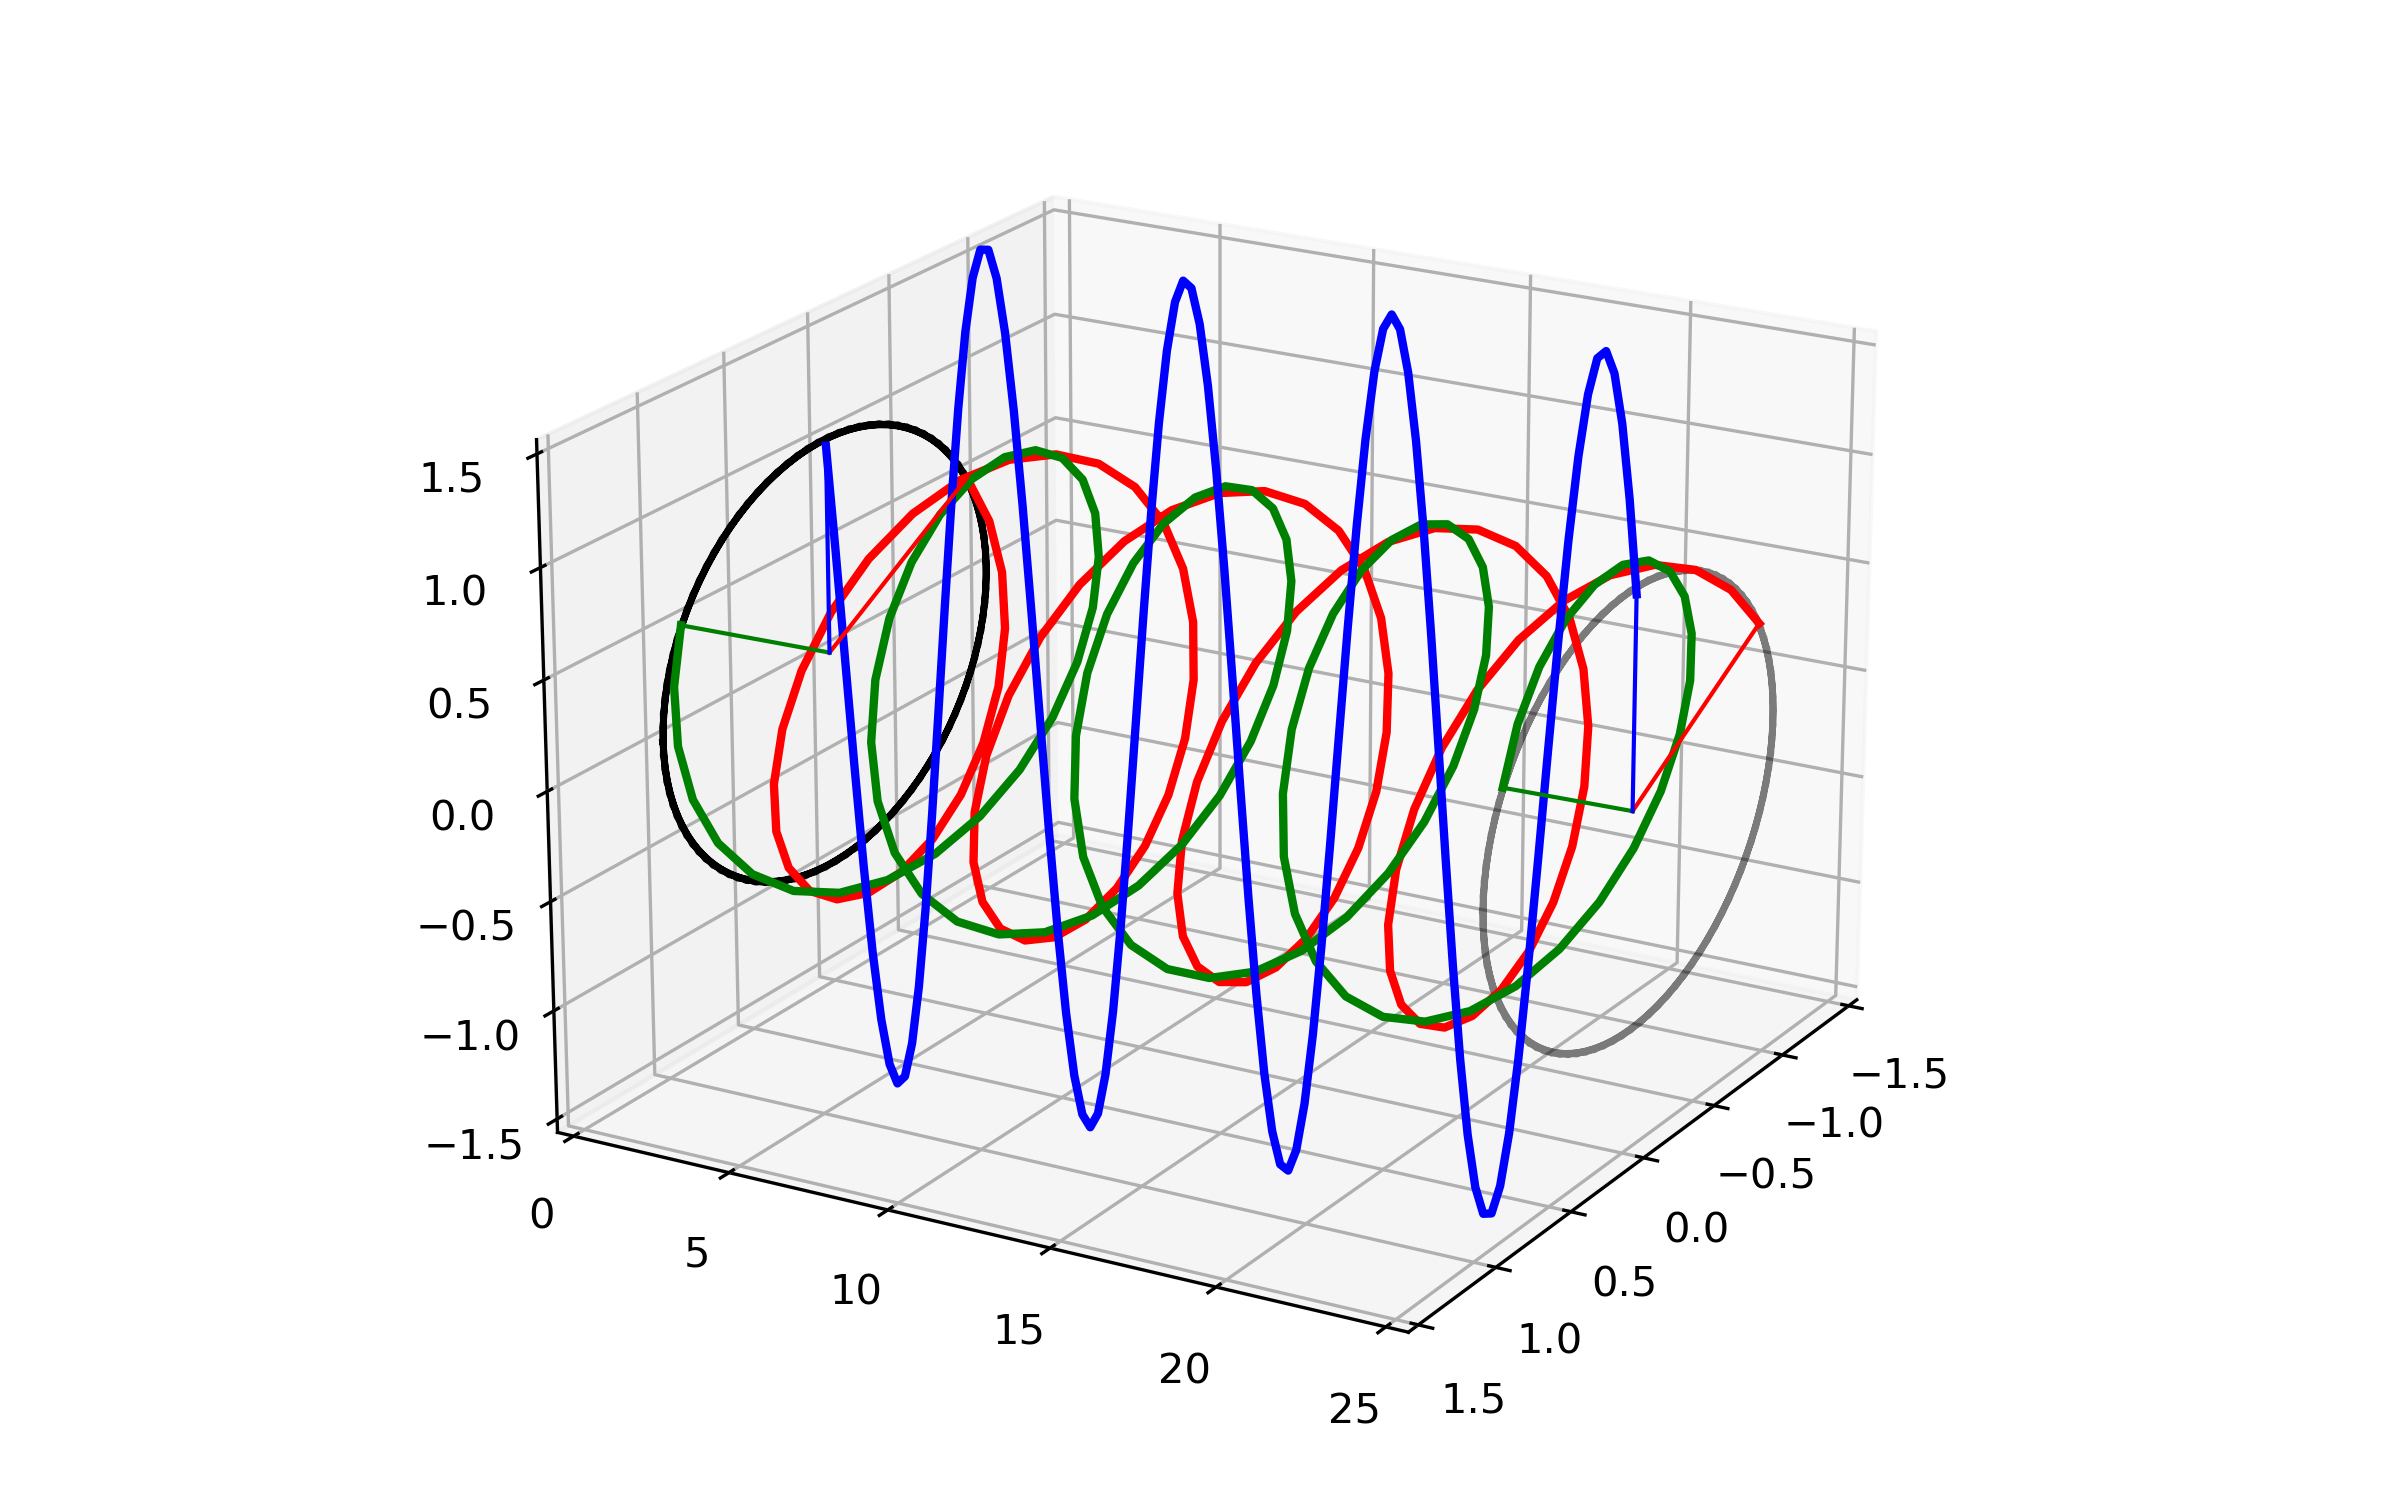

/var/folders/tx/_6jtwg352ggcym5t4sv9wn5r0000gn/T/ipykernel_27470/3975950284.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3(fig) # 3d axis
/var/folders/tx/_6jtwg352ggcym5t4sv9wn5r0000gn/T/ipykernel_27470/3975950284.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [30]:
fig = plt.figure(figsize=(8,5),dpi=150)
ax = p3(fig) # 3d axis
ax.set_xlim(-1.5,1.5)
ax.set_ylim(0,endpoint)
ax.set_zlim(-1.5,1.5)
ax.view_init(20,30)
ax.set_frame_on(False)
fig.patch.set_alpha(0.)
fig.tight_layout()

# make a circle at the beginning and end
ax.plot(Data0[0][0],[0]*len(y),Data0[0][2],c='k')
ax.plot(Data0[0][0],[endpoint]*len(y),Data0[0][2],c='k',alpha=0.5)

# make a damped circle at the end if needed
if r_damp:
    ax.plot(Data0[0][0]*endfactor,[endpoint]*len(y),Data0[0][2]*endfactor,c='grey',alpha=0.5)

# make an oval for the sum at the end
#ax.plot(Data2[:][0][-1],[endpoint]*len(y),Data2[:][2][-1],c='grey',alpha=0.5)
#ax.plot(Data0[0][0]+Data1[0][0]*endfactor,
#        [endpoint]*len(y),
#        Data0[0][2]+Data1[0][2]*endfactor,
#        c='grey',alpha=0.5)


# plot L, R, and L+R at first step
line0 = plt.plot(Data0[0][0],Data0[0][1],Data0[0][2],lw=2,c='r')[0]
line1 = plt.plot(Data1[0][0],Data1[0][1],Data1[0][2],lw=2,c='g')[0] 
line2 = plt.plot(Data2[0][0],Data2[0][1],Data2[0][2],lw=2,c='b')[0] 

# plot initial vectors
iv0   = plt.plot(ivec0[0][0],ivec0[0][1],ivec0[0][2],lw=1,c='r')[0]
iv1   = plt.plot(ivec1[0][0],ivec1[0][1],ivec1[0][2],lw=1,c='g')[0]
iv2   = plt.plot(ivec2[0][0],ivec2[0][1],ivec2[0][2],lw=1,c='b')[0]

# plot final vectors
fv0   = plt.plot(fvec0[0][0],fvec0[0][1],fvec0[0][2],lw=1,c='r')[0]
fv1   = plt.plot(fvec1[0][0],fvec1[0][1],fvec1[0][2],lw=1,c='g')[0]
fv2   = plt.plot(fvec2[0][0],fvec2[0][1],fvec2[0][2],lw=1,c='b')[0]

def anim(i):
    line0.set_data(Data0[i][0],Data0[0][1]) # Lx,Ly
    line0.set_3d_properties(Data0[i][2])    # Lz
    
    line1.set_data(Data1[i][0],Data1[0][1]) # Rx,Ry
    line1.set_3d_properties(Data1[i][2])    # Rz
    
    line2.set_data(Data2[i][0],Data2[0][1]) # Sx,Sy
    line2.set_3d_properties(Data2[i][2])    # Sz
 
    # initial vectors
    iv0.set_data(ivec0[i][0],ivec0[0][1])
    iv1.set_data(ivec1[i][0],ivec1[0][1])
    iv2.set_data(ivec2[i][0],ivec2[0][1])
    iv0.set_3d_properties(ivec0[i][2])
    iv1.set_3d_properties(ivec1[i][2])
    iv2.set_3d_properties(ivec2[i][2])
    
    # final vectors
    fv0.set_data(fvec0[i][0],fvec0[0][1])
    fv1.set_data(fvec1[i][0],fvec1[0][1])
    fv2.set_data(fvec2[i][0],fvec2[0][1])
    fv0.set_3d_properties(fvec0[i][2])
    fv1.set_3d_properties(fvec1[i][2])
    fv2.set_3d_properties(fvec2[i][2])
    
line_ani = FuncAnimation(fig, anim, frames=100, interval=10, blit=False)
#plt.show()

In [31]:
Writer = writers['ffmpeg']
#writer = Writer(fps=20, metadata={'artist': 'BGP'}, bitrate=2000)
writer = Writer(fps=20, metadata={'artist': 'BGP'}, bitrate=750)
line_ani.save('cir.mp4', writer,
             savefig_kwargs={'transparent': True, 'facecolor': 'none'})

In [18]:
#line_ani.save('cd.mov', codec="png",
#         dpi=100, bitrate=-1, 
#         savefig_kwargs={'transparent': True, 'facecolor': 'none'})